In [24]:
# Standard libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Append base directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
path1p = os.path.dirname(currentdir)
path2p = os.path.dirname(path1p)
libpath = os.path.join(path1p, "lib")
pwd_mat = os.path.join(os.path.join(path2p, "data/"), "sim_ds_mat")
pwd_h5 = os.path.join(os.path.join(path2p, "data/"), "sim_ds_h5")

sys.path.insert(0, libpath) 
print("Appended library directory", libpath)

# User libraries
from signal_lib import resample
from qt_wrapper import gui_fnames
from matlab.h5data_lib import readTE_H5, getStatistics, parseTEfolders, getTitlesAndIndices

Appended library directory /media/aleksejs/DataHDD/work/codes/theoretical-models/experimental-bridge/nest-mesoscopic-metric-test/codes/lib


## Processing single point data

In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
# Get datasets and parse them
path_tmp = "/mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study"
datafilesets, basenamesets, statistics = parseTEfolders(path_tmp)

Total user files in dataset 0 is 52
{'mousename': {'mtp_15': 52}, 'analysis': {'swipe': 52, 'range': 0, 'all': 0}, 'trial': {'GO': 26, 'NOGO': 26, 'ALL': 0}, 'range': {'CUE': 0, 'TEX': 0, 'LIK': 0, 'none': 52}, 'method': {'BTE': 26, 'MTE': 26}}
Total user files in dataset 1 is 52
{'mousename': {'mtp_15': 52}, 'analysis': {'swipe': 52, 'range': 0, 'all': 0}, 'trial': {'GO': 26, 'NOGO': 26, 'ALL': 0}, 'range': {'CUE': 0, 'TEX': 0, 'LIK': 0, 'none': 52}, 'method': {'BTE': 26, 'MTE': 26}}
Total user files in dataset 2 is 52
{'mousename': {'mtp_15': 52}, 'analysis': {'swipe': 52, 'range': 0, 'all': 0}, 'trial': {'GO': 26, 'NOGO': 26, 'ALL': 0}, 'range': {'CUE': 0, 'TEX': 0, 'LIK': 0, 'none': 52}, 'method': {'BTE': 26, 'MTE': 26}}
Total user files in dataset 3 is 52
{'mousename': {'mtp_15': 52}, 'analysis': {'swipe': 52, 'range': 0, 'all': 0}, 'trial': {'GO': 26, 'NOGO': 26, 'ALL': 0}, 'range': {'CUE': 0, 'TEX': 0, 'LIK': 0, 'none': 52}, 'method': {'BTE': 26, 'MTE': 26}}


In [15]:
# Read data
datasets = [np.array([readTE_H5(filepath) for filepath in setfilepaths]) for setfilepaths in datafilesets]

Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_10/mtp_15_2018_05_16_a_iGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_10/mtp_15_2018_05_16_a_iGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_10/mtp_15_2018_05_16_a_iNOGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_10/mtp_15_2018_05_16_a_iNOGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_10/mtp_15_2018_05_17_a_iGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_10/mtp_15_2018_05_17_a_iGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Y

Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_10/mtp_15_2018_06_04_a_iNOGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_3/mtp_15_2018_05_16_a_iGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_3/mtp_15_2018_05_16_a_iGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_3/mtp_15_2018_05_16_a_iNOGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_3/mtp_15_2018_05_16_a_iNOGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_3/mtp_15_2018_05_17_a_iGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro

Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/raw_delay_2_window_3/mtp_15_2018_06_04_a_iNOGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_2_window_6/mtp_15_2018_05_16_a_iGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_2_window_6/mtp_15_2018_05_16_a_iGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_2_window_6/mtp_15_2018_05_16_a_iNOGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_2_window_6/mtp_15_2018_05_16_a_iNOGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_2_window_6/mtp_15_2018_05_17_a_iGO_BivariateTE_swipe.h5
Reading

Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_2_window_6/mtp_15_2018_06_04_a_iNOGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_5_window_6/mtp_15_2018_05_16_a_iGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_5_window_6/mtp_15_2018_05_16_a_iGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_5_window_6/mtp_15_2018_05_16_a_iNOGO_BivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_5_window_6/mtp_15_2018_05_16_a_iNOGO_MultivariateTE_swipe.h5
Reading file /mnt/hifo_scratch1/Yaro/TE_from_Aleksejs/data_idtxl/swipe/specific-param-study/subsample_delay_5_window_6/mtp_15_2018_05_17_a_iGO_BivariateTE_swipe.h5
R

## Swipe Analysis

**TODO**:
1) Plot: Diff nlinks between two datasets
2) Plot: Shared/Overlap links between two datasets

**Later**
1) Convert storage to PANDAS
2) Adequately rename folders in structure
3) Separate plots from main code, save figures to file.

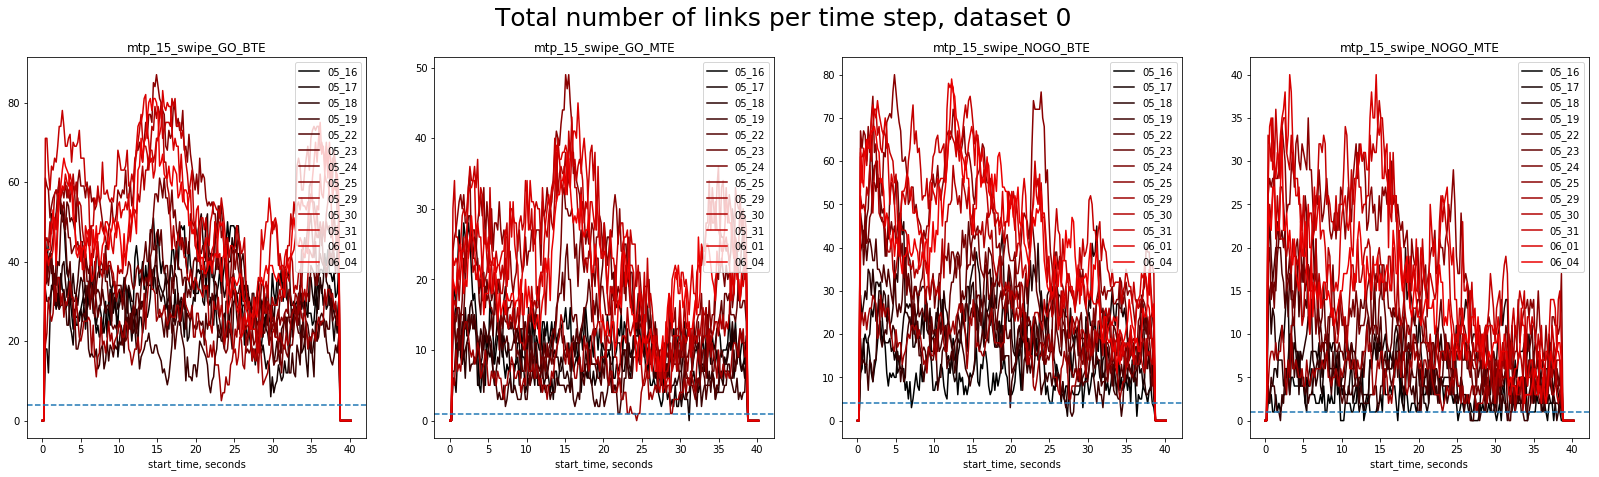

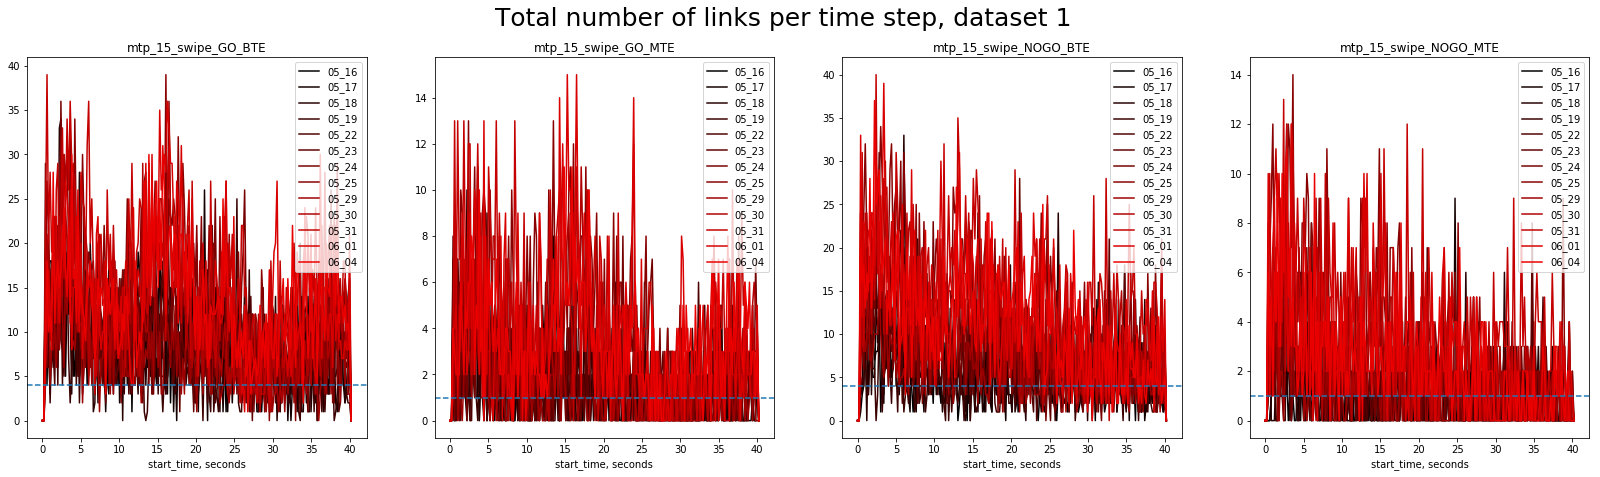

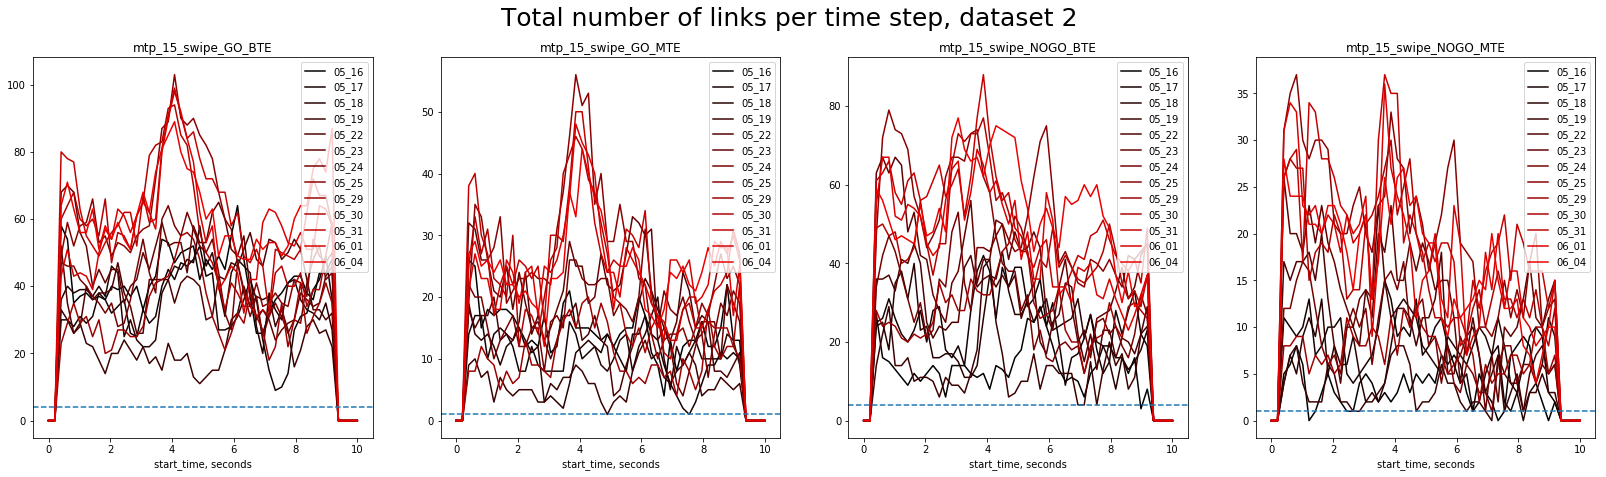

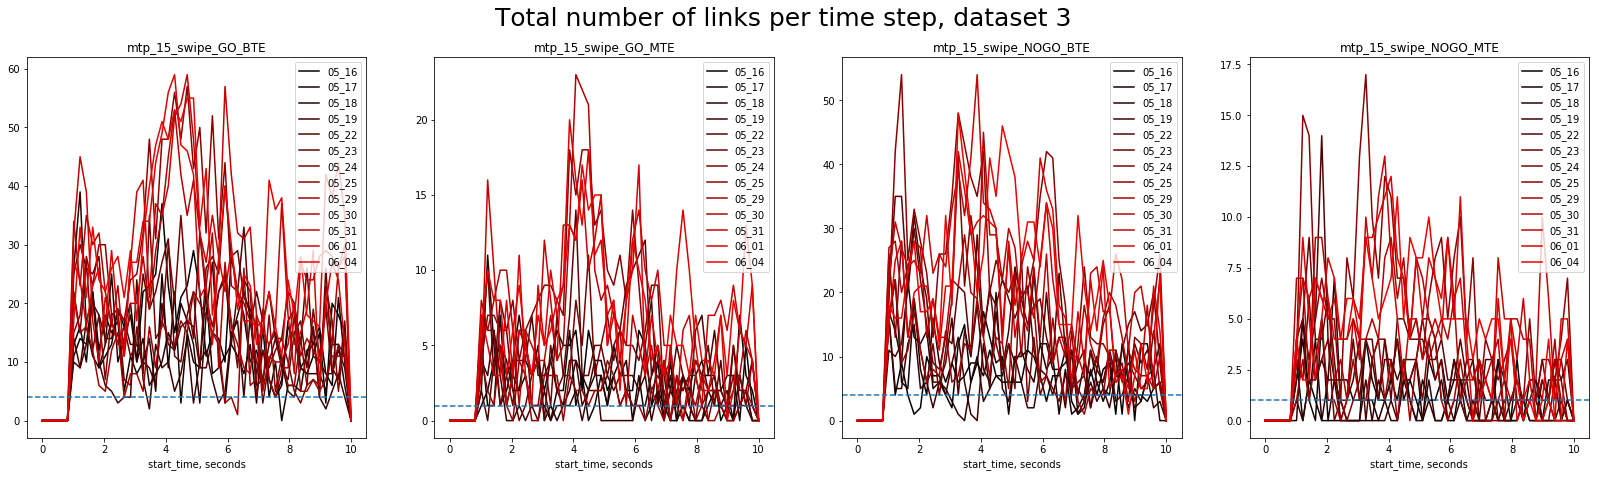

In [16]:
#################################
# time : Total Number of links
#################################

for iDataSet, (basenames, stat) in enumerate(zip(basenamesets, statistics)):
    tflist = getTitlesAndIndices(stat, 'mtp_15', ["GO","NOGO"], ["BTE","MTE"], "swipe")
    nPlots = len(tflist)

    fig, ax = plt.subplots(nrows=1, ncols=nPlots, figsize=(7*nPlots, 7))
    fig.suptitle('Total number of links per time step, dataset '+str(iDataSet), fontsize=25)

    for idxPlot, (pTitle, idxs_ths) in enumerate(tflist):
        nFiles = np.sum(idxs_ths)
        for idxFile, (data, basename) in enumerate(zip(datasets[iDataSet][idxs_ths], basenames[idxs_ths])):
            te, lag, p = data

            times = 0.2 * np.linspace(0, te.shape[2], te.shape[2])
            totalConnPerTime = [np.sum(1-np.isnan(te[:,:,i]).astype(int)) for i in range(te.shape[2])]

            ax[idxPlot].plot(times, totalConnPerTime, label=basename[12:17], color=((idxFile / nFiles), 0, 0))

        ax[idxPlot].set_title(pTitle)
        ax[idxPlot].axhline(y=4 if "BTE" in pTitle else 1, linestyle="--")
        ax[idxPlot].set_xlabel("start_time, seconds")
        ax[idxPlot].legend()

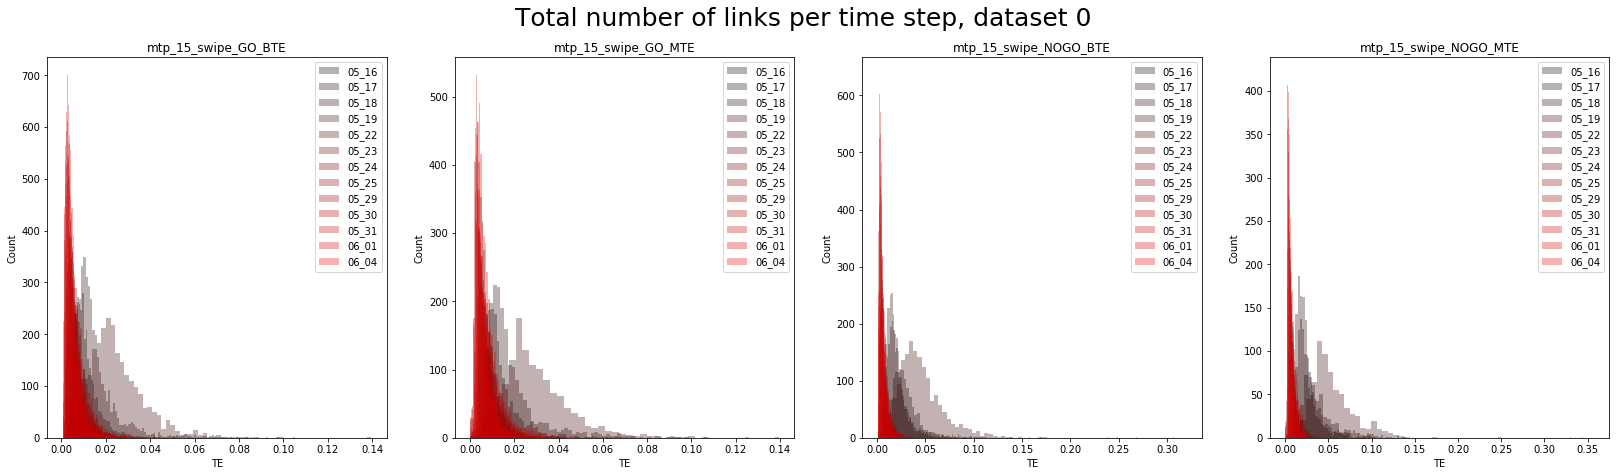

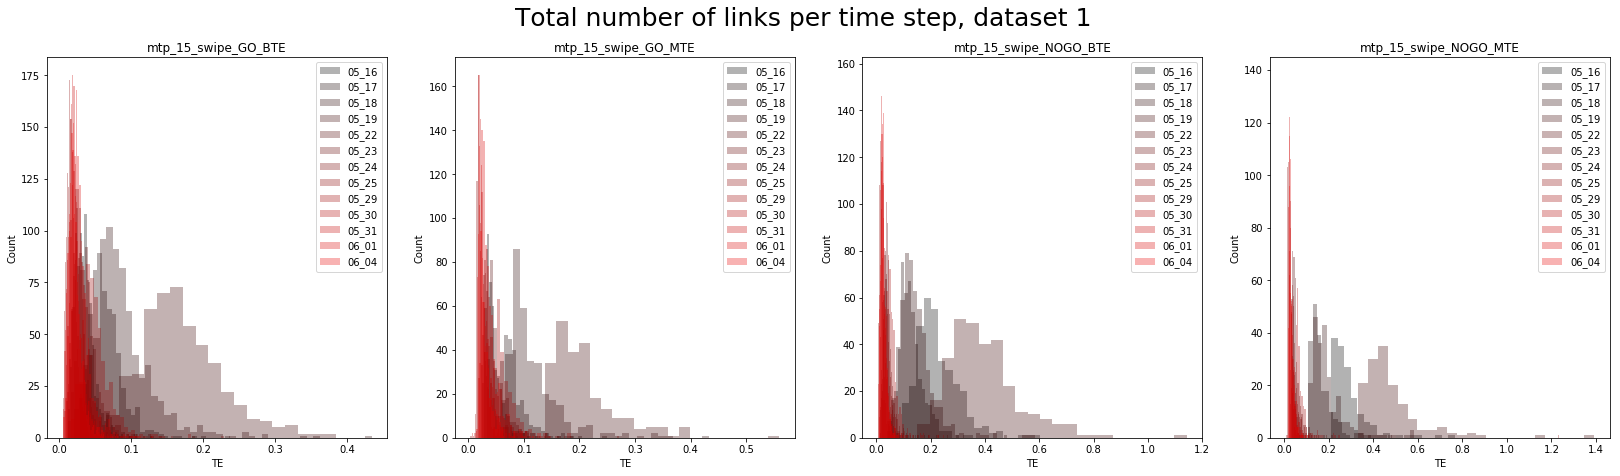

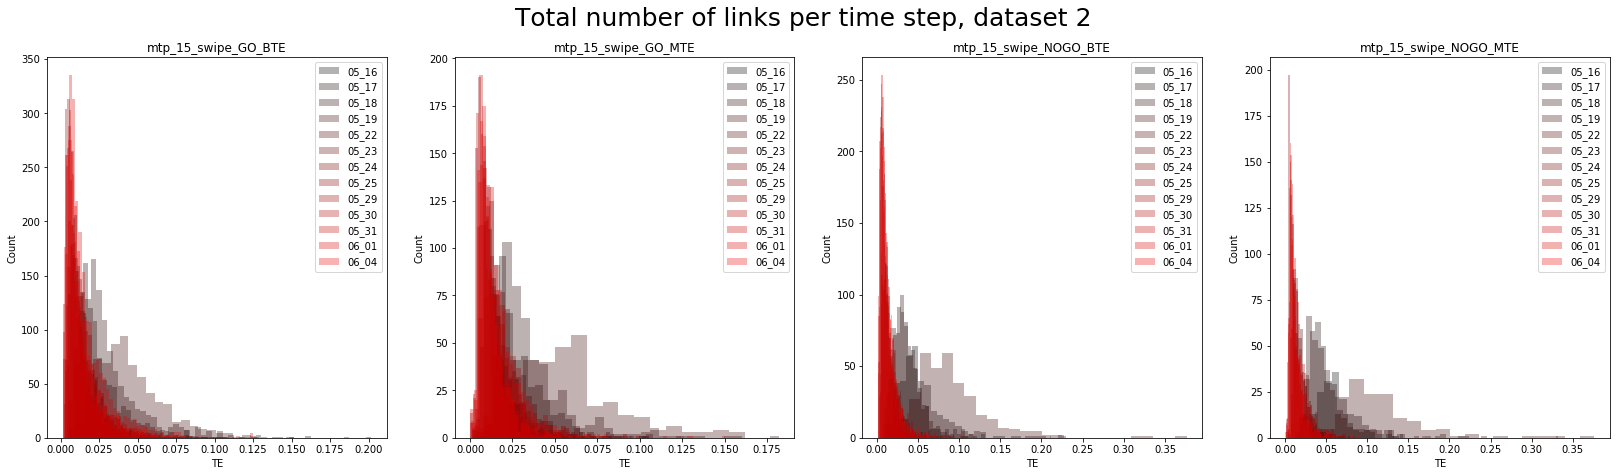

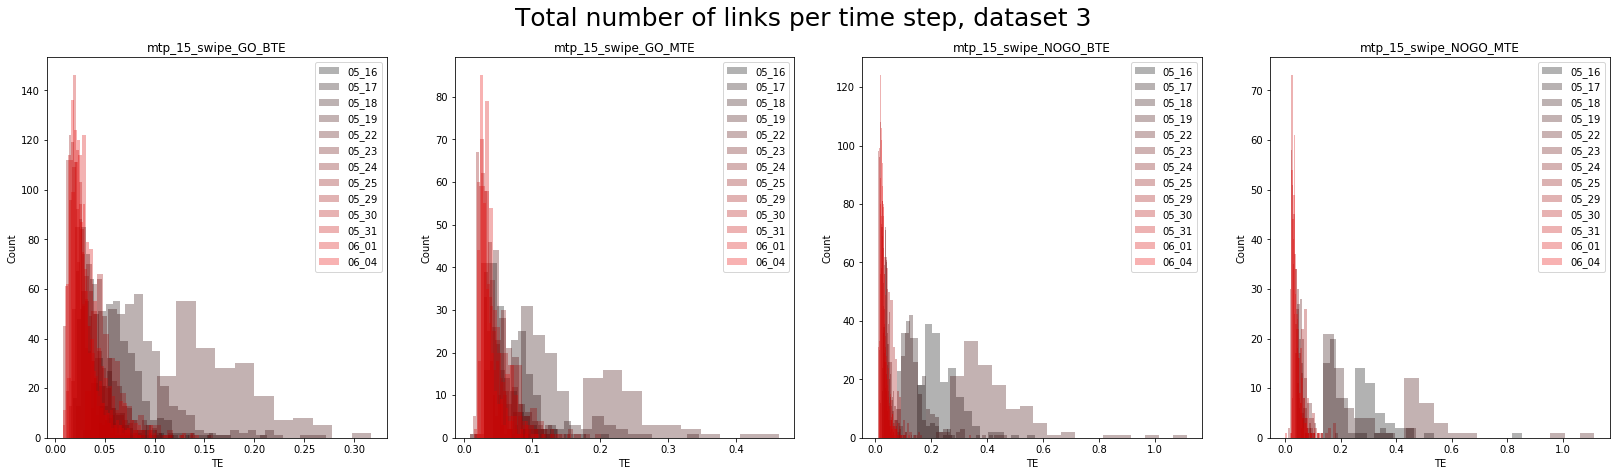

In [43]:
#################################
# Distribution of TE
#################################

for iDataSet, (basenames, stat) in enumerate(zip(basenamesets, statistics)):
    tflist = getTitlesAndIndices(stat, 'mtp_15', ["GO","NOGO"], ["BTE","MTE"], "swipe")
    nPlots = len(tflist)

    fig, ax = plt.subplots(nrows=1, ncols=nPlots, figsize=(7*nPlots, 7))
    fig.suptitle('Total number of links per time step, dataset '+str(iDataSet), fontsize=25)

    for idxPlot, (pTitle, idxs_ths) in enumerate(tflist):
        nFiles = np.sum(idxs_ths)
        for idxFile, (data, basename) in enumerate(zip(datasets[iDataSet][idxs_ths], basenames[idxs_ths])):
            te, lag, p = data
            
            teflat = [te1 for te1,p1 in zip(te.flatten(), p.flatten()) if (not np.isnan(te1)) and (p1 < 0.01)]

            ax[idxPlot].hist(teflat, bins='auto', label=basename[12:17], color=((idxFile / nFiles), 0, 0), alpha=0.3)

        ax[idxPlot].set_title(pTitle)
        ax[idxPlot].set_xlabel("TE")
        ax[idxPlot].set_ylabel("Count")
        ax[idxPlot].legend()

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


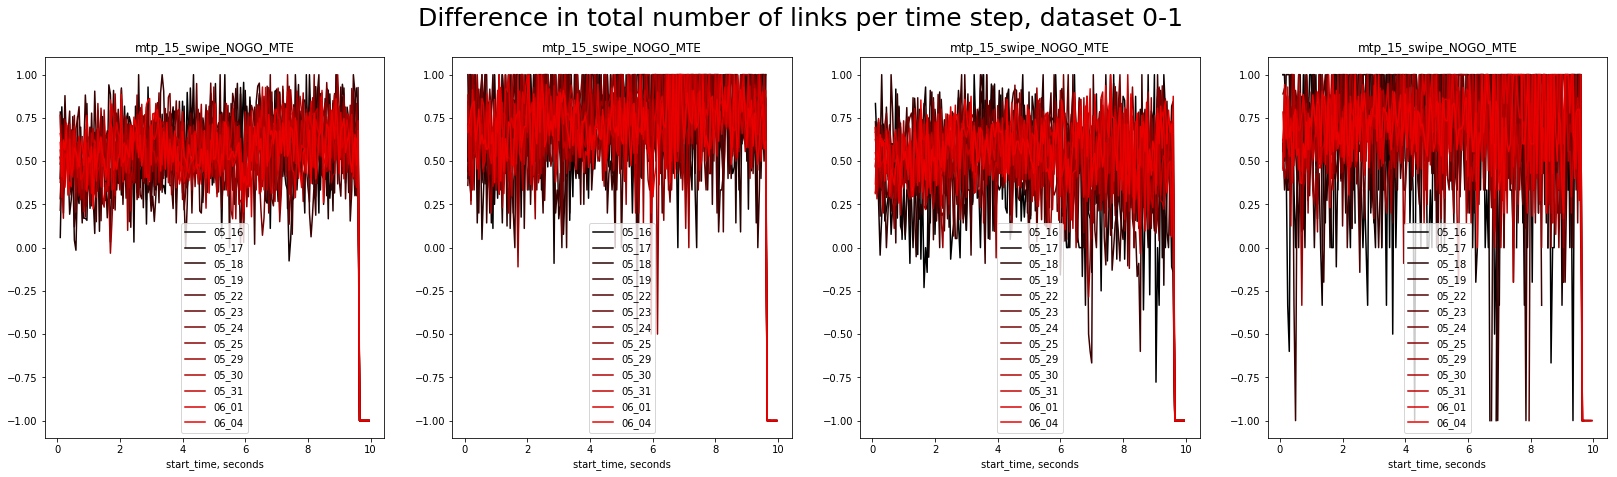

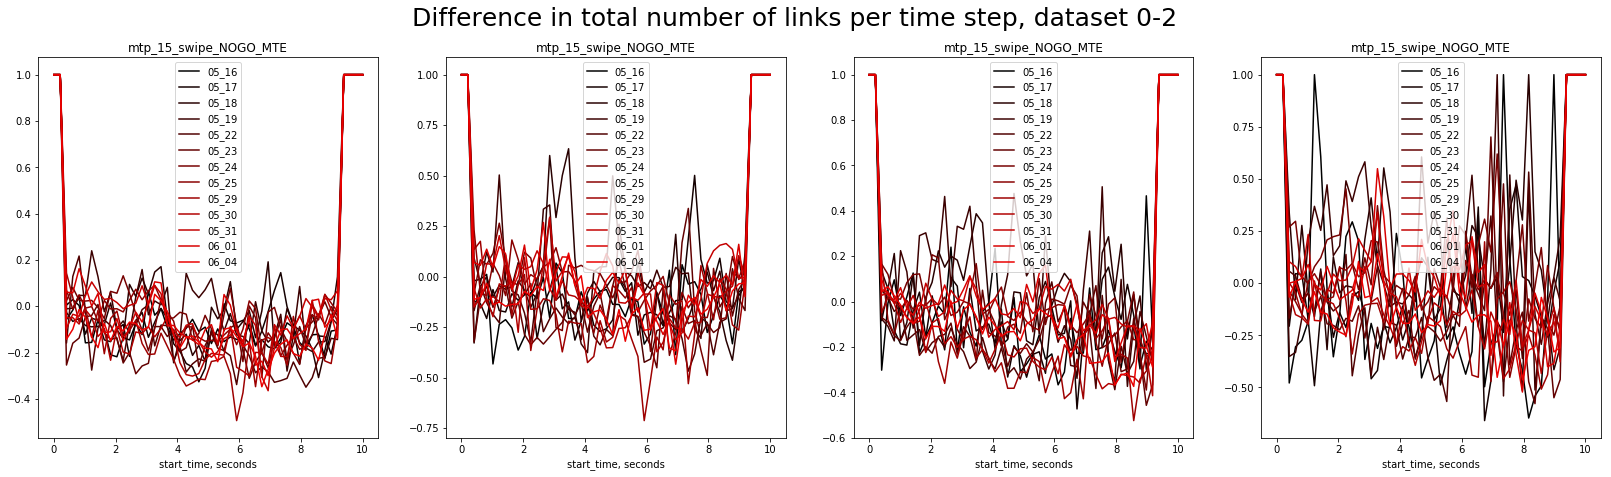

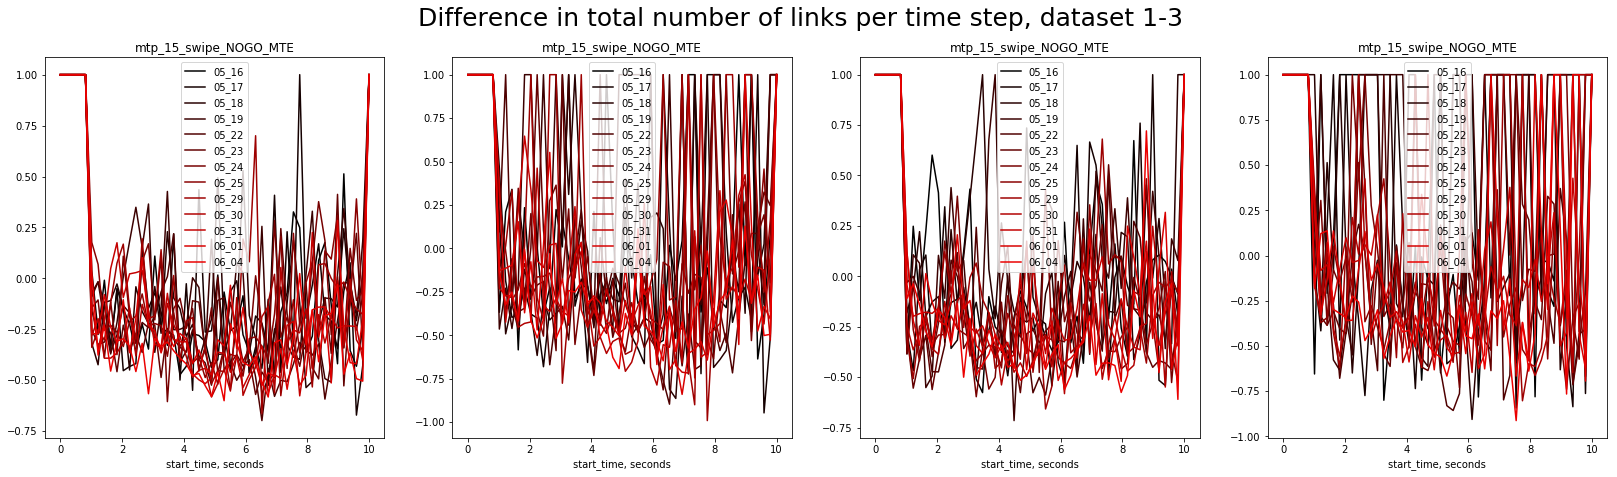

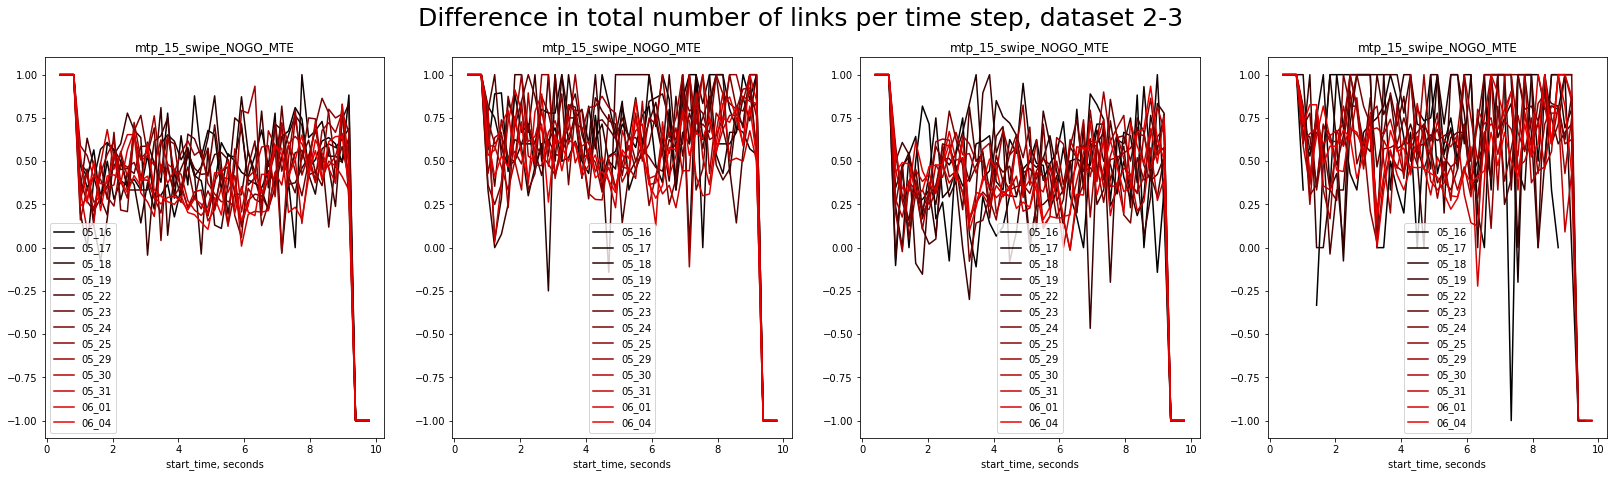

In [29]:
#################################
# time : Total Number of links
#################################

def comp_nlinks(iDataSet1, iDataSet2, T1, T2):
    tflist1 = getTitlesAndIndices(statistics[iDataSet1], 'mtp_15', ["GO","NOGO"], ["BTE","MTE"], "swipe")
    tflist2 = getTitlesAndIndices(statistics[iDataSet2], 'mtp_15', ["GO","NOGO"], ["BTE","MTE"], "swipe")
    nPlots1 = len(tflist1)
    nPlots2 = len(tflist2)
    assert nPlots1 == nPlots2, "Not the same number of days"

    
    fig, ax = plt.subplots(nrows=1, ncols=nPlots1, figsize=(7*nPlots1, 7))
    fig.suptitle('Difference in total number of links per time step, dataset '+str(iDataSet1)+'-'+str(iDataSet2), fontsize=25)
    
    for idxPlot in range(nPlots):
        pTitle1, idxs_ths1 = tflist1[idxPlot]
        pTitle2, idxs_ths2 = tflist2[idxPlot]
        nFiles1 = np.sum(idxs_ths1)
        nFiles2 = np.sum(idxs_ths2)
        assert nFiles1 == nFiles2, "Not the same number of file types"
        
        basenames1 = basenamesets[iDataSet1][idxs_ths1]
        basenames2 = basenamesets[iDataSet2][idxs_ths2]
        datasets1 = datasets[iDataSet1][idxs_ths1]
        datasets2 = datasets[iDataSet2][idxs_ths2]
        
        for idxFile in range(nFiles):
            basename1 = basenames1[idxFile]
            basename2 = basenames2[idxFile]
            assert basename1 == basename2, "Basenames not aligned"
            te1, lag1, p1 = datasets1[idxFile]
            te2, lag2, p2 = datasets2[idxFile]

            times1 = np.linspace(0, T1, te1.shape[2])
            times2 = np.linspace(0, T2, te2.shape[2])
            totalconn = lambda te : np.array([np.sum(1-np.isnan(te[:,:,i]).astype(int)) for i in range(te.shape[2])])
            totalConnPerTime1 = totalconn(te1)
            totalConnPerTime2 = totalconn(te2)
            
            # If datasets have different timestep, resample to the smallest one
            if te1.shape[2] > te2.shape[2]:
                times1, totalConnPerTime1 = times2, resample(times1, totalConnPerTime1, times2, {'method' : 'averaging', 'kind' : 'kernel'})
            elif te1.shape[2] < te2.shape[2]:
                times2, totalConnPerTime2 = times1, resample(times2, totalConnPerTime2, times1, {'method' : 'averaging', 'kind' : 'kernel'})
            
            diff = totalConnPerTime1 - totalConnPerTime2
            summ = totalConnPerTime1 + totalConnPerTime2

            ax[idxPlot].plot(times1, diff/summ, label=basename1[12:17], color=((idxFile / nFiles), 0, 0))

        ax[idxPlot].set_title(pTitle)
        ax[idxPlot].set_xlabel("start_time, seconds")
        ax[idxPlot].legend()
        
comp_nlinks(0, 1, 10.0, 10.0)
comp_nlinks(0, 2, 10.0, 10.0)
comp_nlinks(1, 3, 10.0, 10.0)
comp_nlinks(2, 3, 10.0, 10.0)

In [36]:
#################################
# Degree Distribution
#################################
'''
  For each dataset, for each file, for each param combination
'''
import pandas as pd

# Neuron Labels
#labels = ['Cpu', 'GP', 'Rt', 'S1_bf', 'LD', 'VM', 'VL', 'CA1', 'CA1_Py', 'CA1_Mol', 'DG', 'M1']
labels = ['Cpu','GP','Po','S1_bf','VM','VL','LDVL','M1','CA1_Py','LHb','cc','cc']
pd.DataFrame({i : l for i,l in enumerate(labels)}, index=["Region Name"])

# # Behaviour Labels
# labels = ['lick', 'paw', 'Start Cue', 'End Cue', 'Reward', 'First Touch']
# pd.DataFrame({i : l for i,l in enumerate(labels)}, index=["Behaviour"])

0   1   2      3   4   5     6   7       8    9   10  11
Region Name  Cpu  GP  Po  S1_bf  VM  VL  LDVL  M1  CA1_Py  LHb  cc  cc

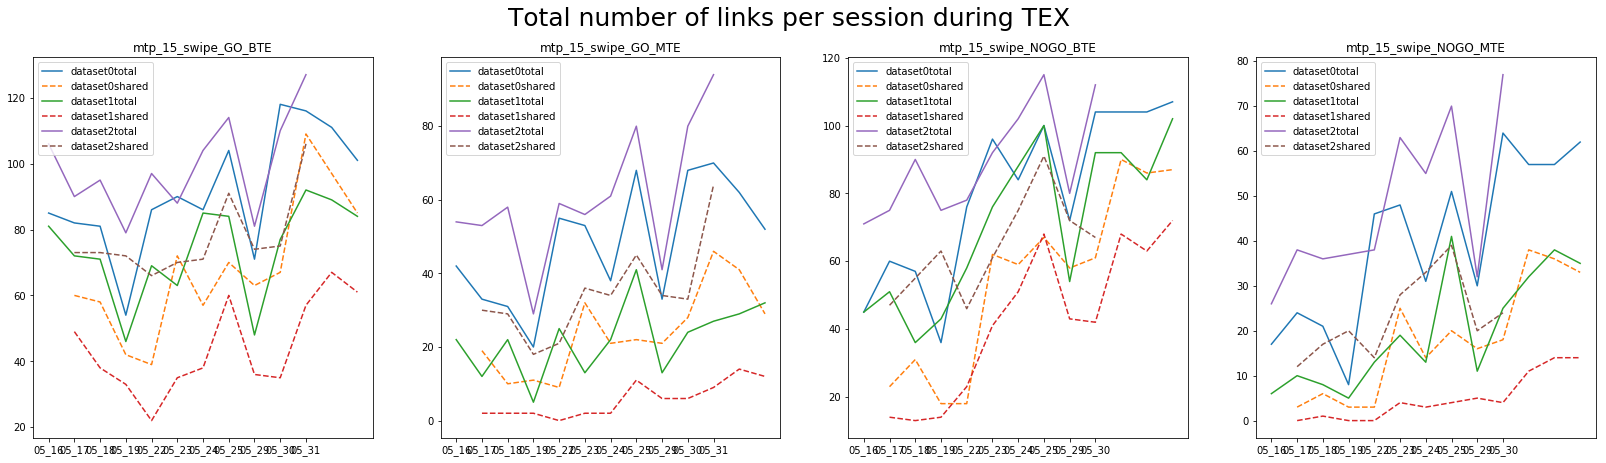

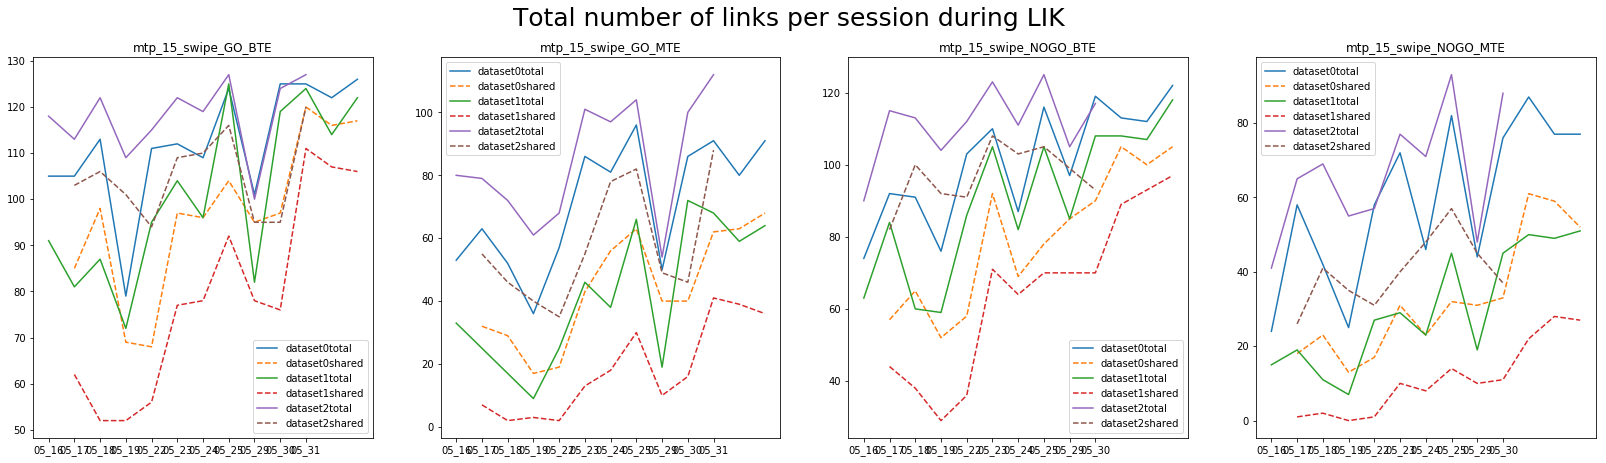

In [6]:
#################################
# Session : Total number of links
#################################
ranges_sec = {'TEX' : (2.0, 3.5), 'LIK' : (3.5, 6.0)}

for rng_name, rng_sec in ranges_sec.items():
    fig, ax = plt.subplots(nrows=1, ncols=nPlots, figsize=(7*nPlots, 7))
    fig.suptitle('Total number of links per session during '+rng_name, fontsize=25)
    
    for iDataSet, (basenames, stat) in enumerate(zip(basenamesets, statistics)):
        tflist = getTitlesAndIndices(stat, 'mtp_15', ["GO","NOGO"], ["BTE","MTE"], "swipe")

        for idxPlot, (pTitle, idxs_ths) in enumerate(tflist):
            nFiles = np.sum(idxs_ths)
            atLeast1ConnPerSession = []
            for idxFile, (data, basename) in enumerate(zip(datasets[iDataSet][idxs_ths], basenames[idxs_ths])):
                te, lag, p = data
                
                N_TIMES = te.shape[2]
                rng = np.round((np.array(rng_sec) / 10.0 * N_TIMES)).astype(int)
                te_rng = te[:,:,rng[0]:rng[1]]
                atLeast1ConnPerSession += [(np.sum(1-np.isnan(te_rng).astype(int), axis=2) > 0).astype(int)]
                
            totalConnPerSession = [np.sum(c) for c in atLeast1ConnPerSession]
            sharedConn = [np.nan] + [np.sum(atLeast1ConnPerSession[idxFile-1] + atLeast1ConnPerSession[idxFile] == 2) for idxFile in range(1, nFiles)]

            ax[idxPlot].plot(totalConnPerSession, label='dataset'+str(iDataSet)+'total')
            ax[idxPlot].plot(sharedConn, '--', label='dataset'+str(iDataSet)+'shared')
            ax[idxPlot].set_title(pTitle)
            ax[idxPlot].set_xticks(list(range(np.sum(idxs_ths))))
            ax[idxPlot].set_xticklabels([bname[12:17] for bname in basenames[idxs_ths]])
            ax[idxPlot].legend()

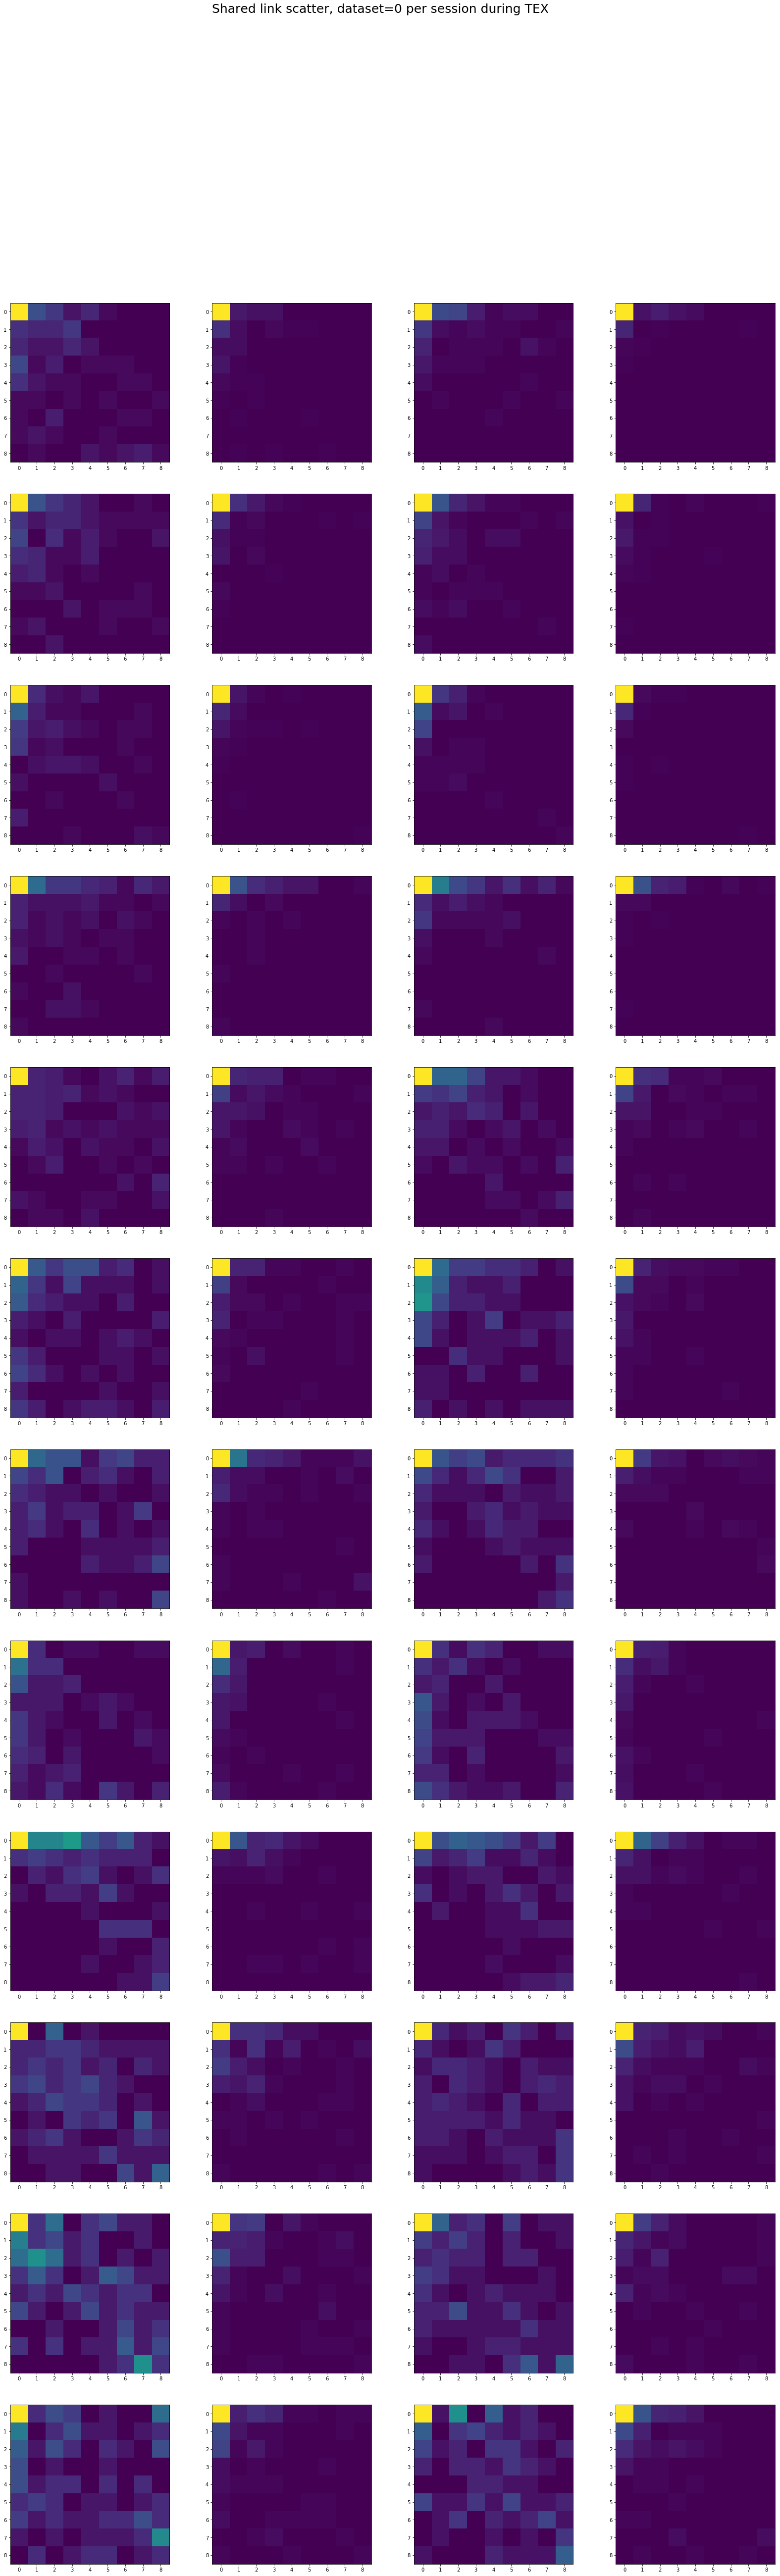

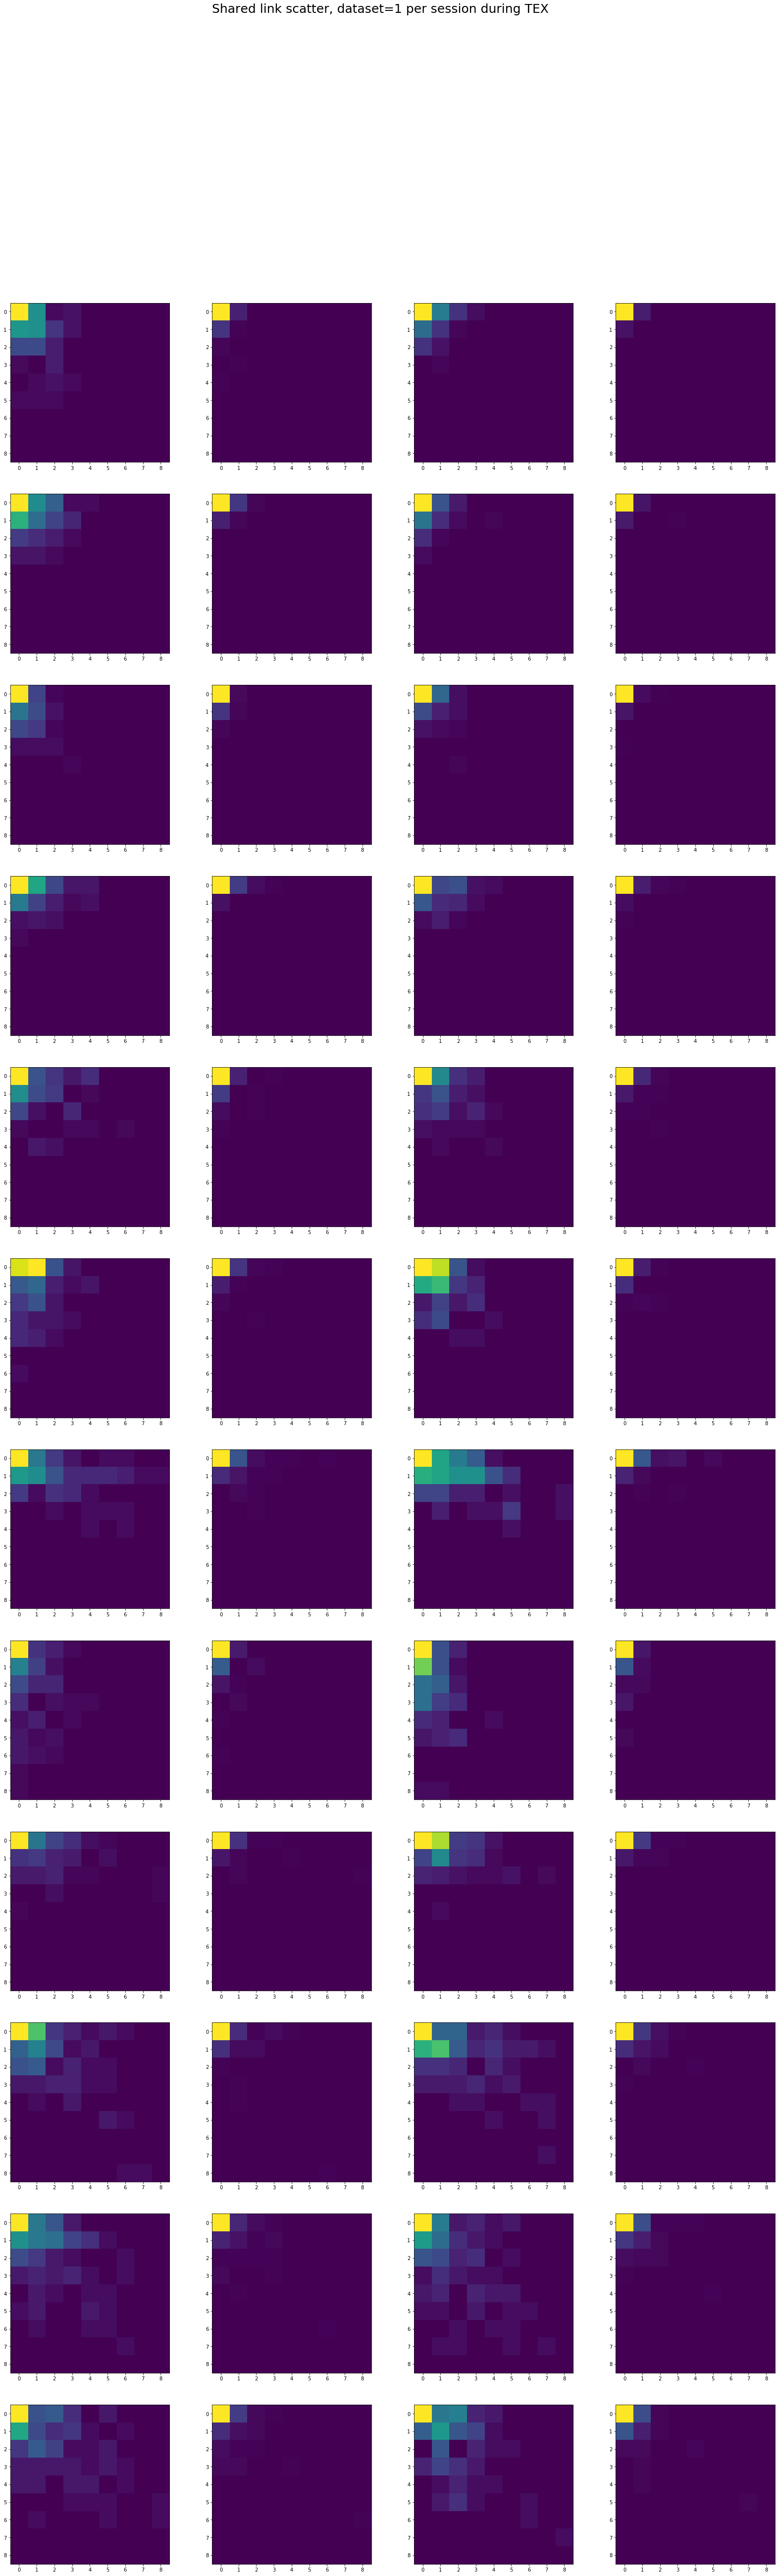

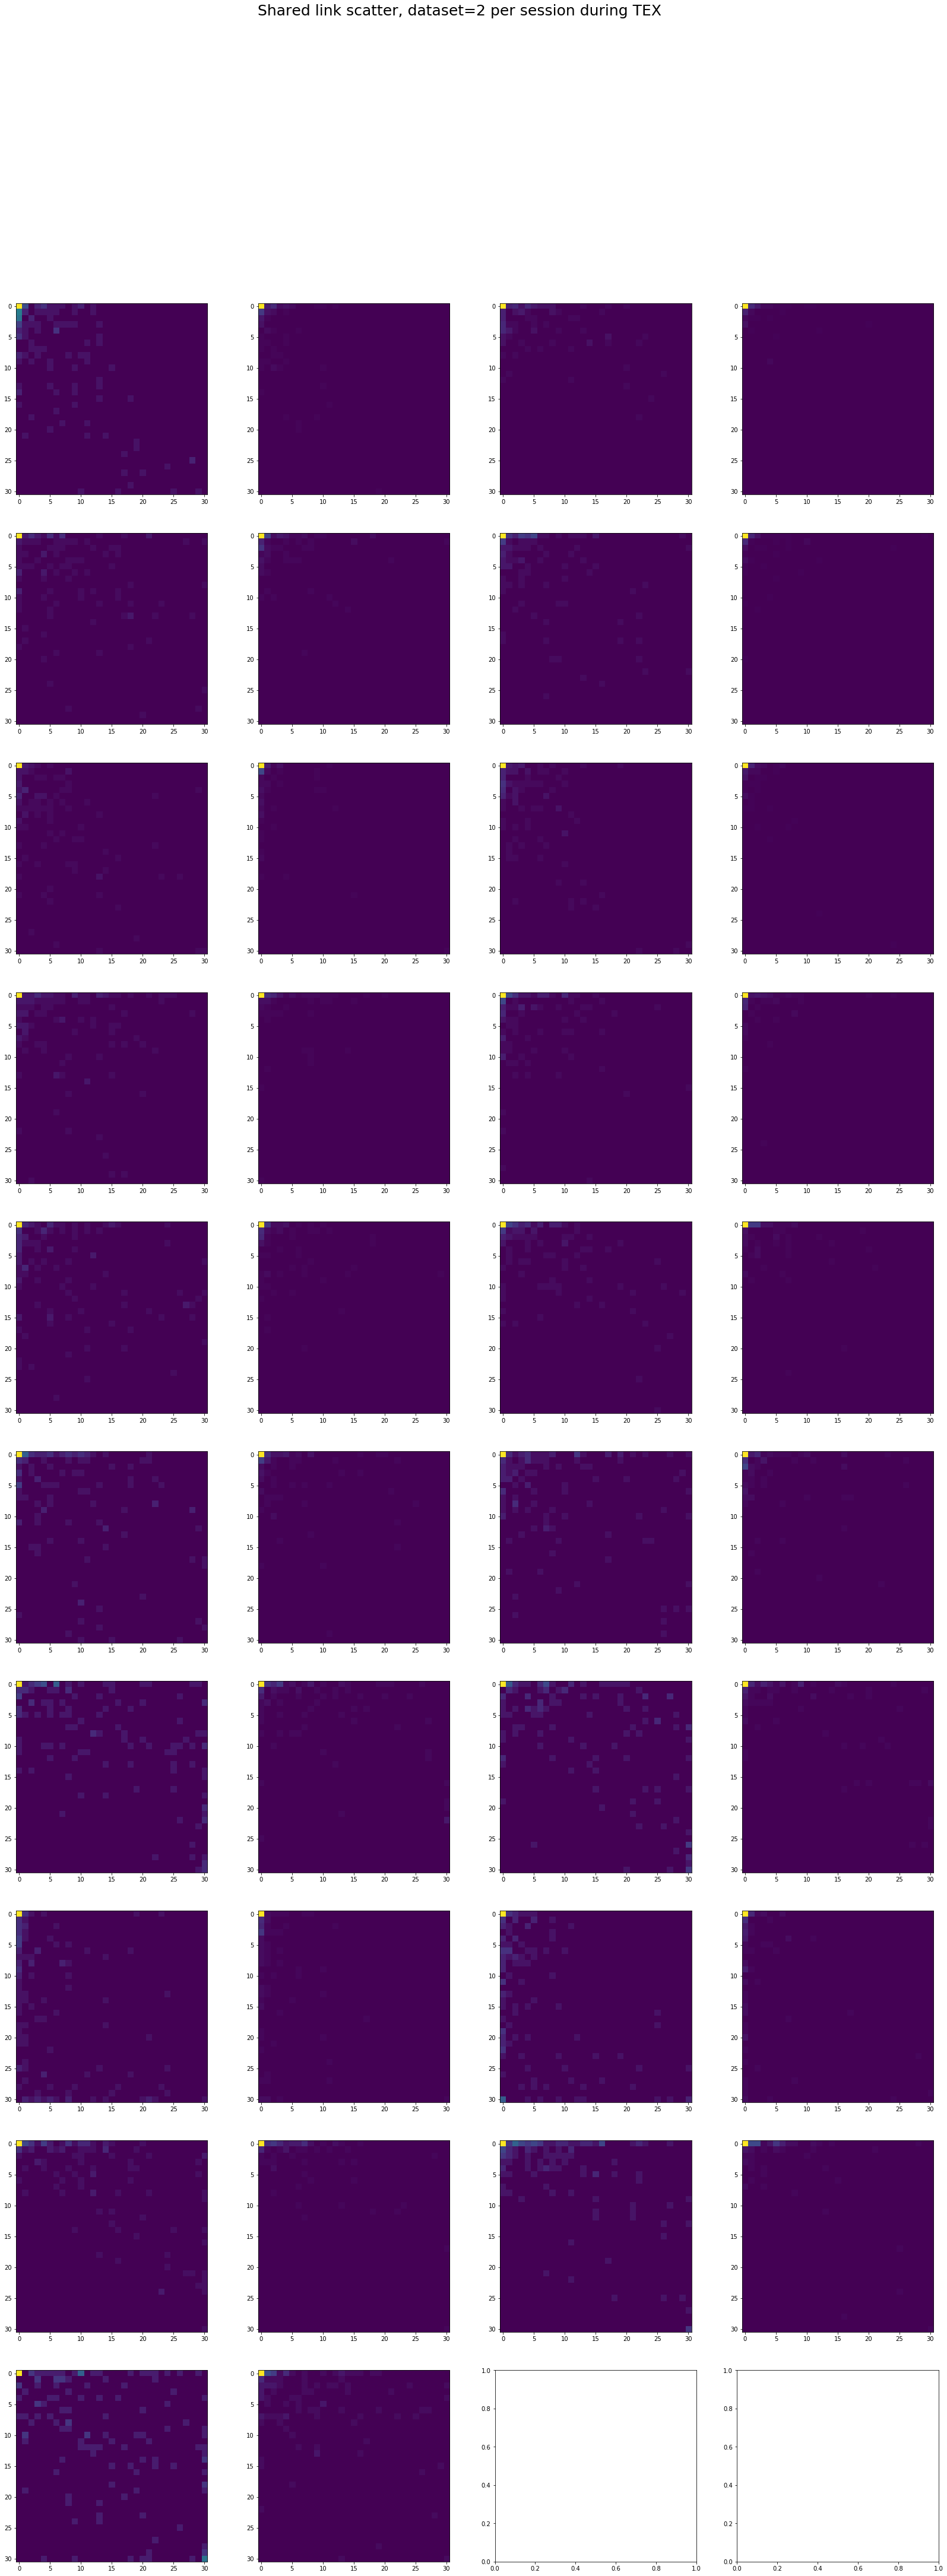

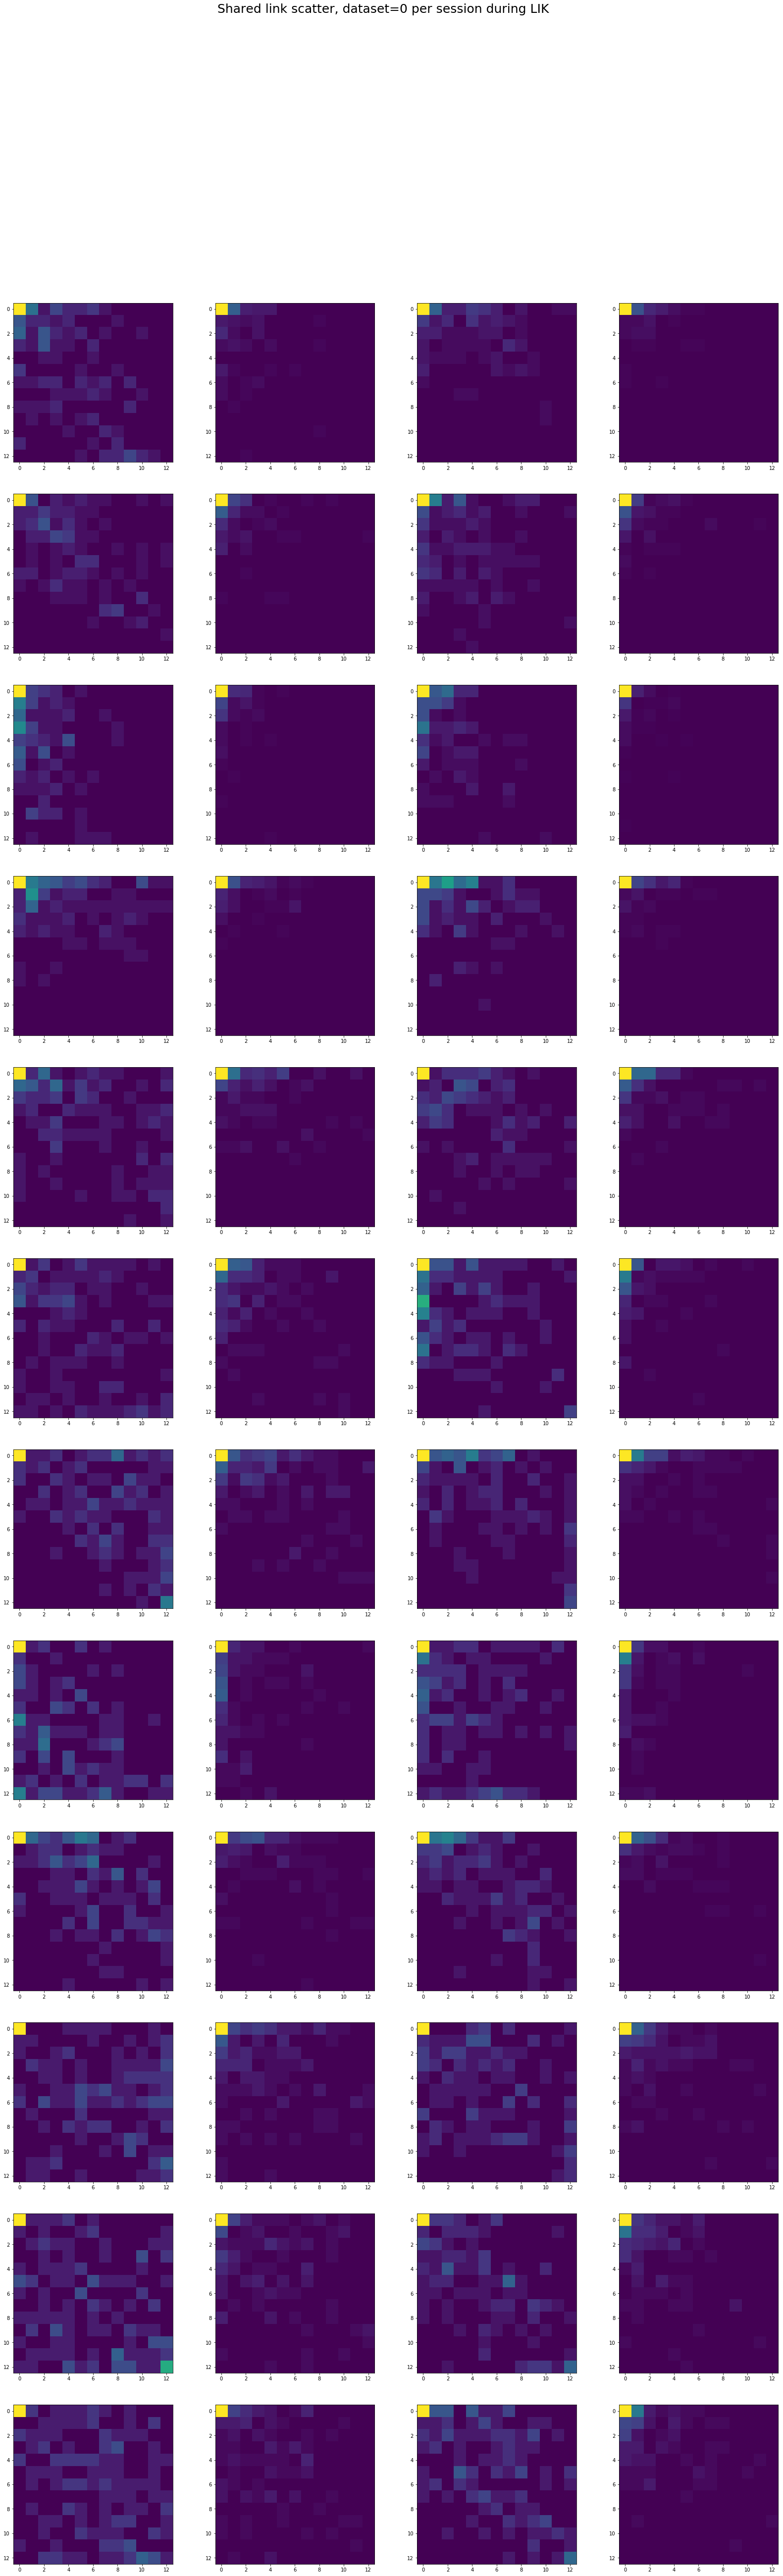

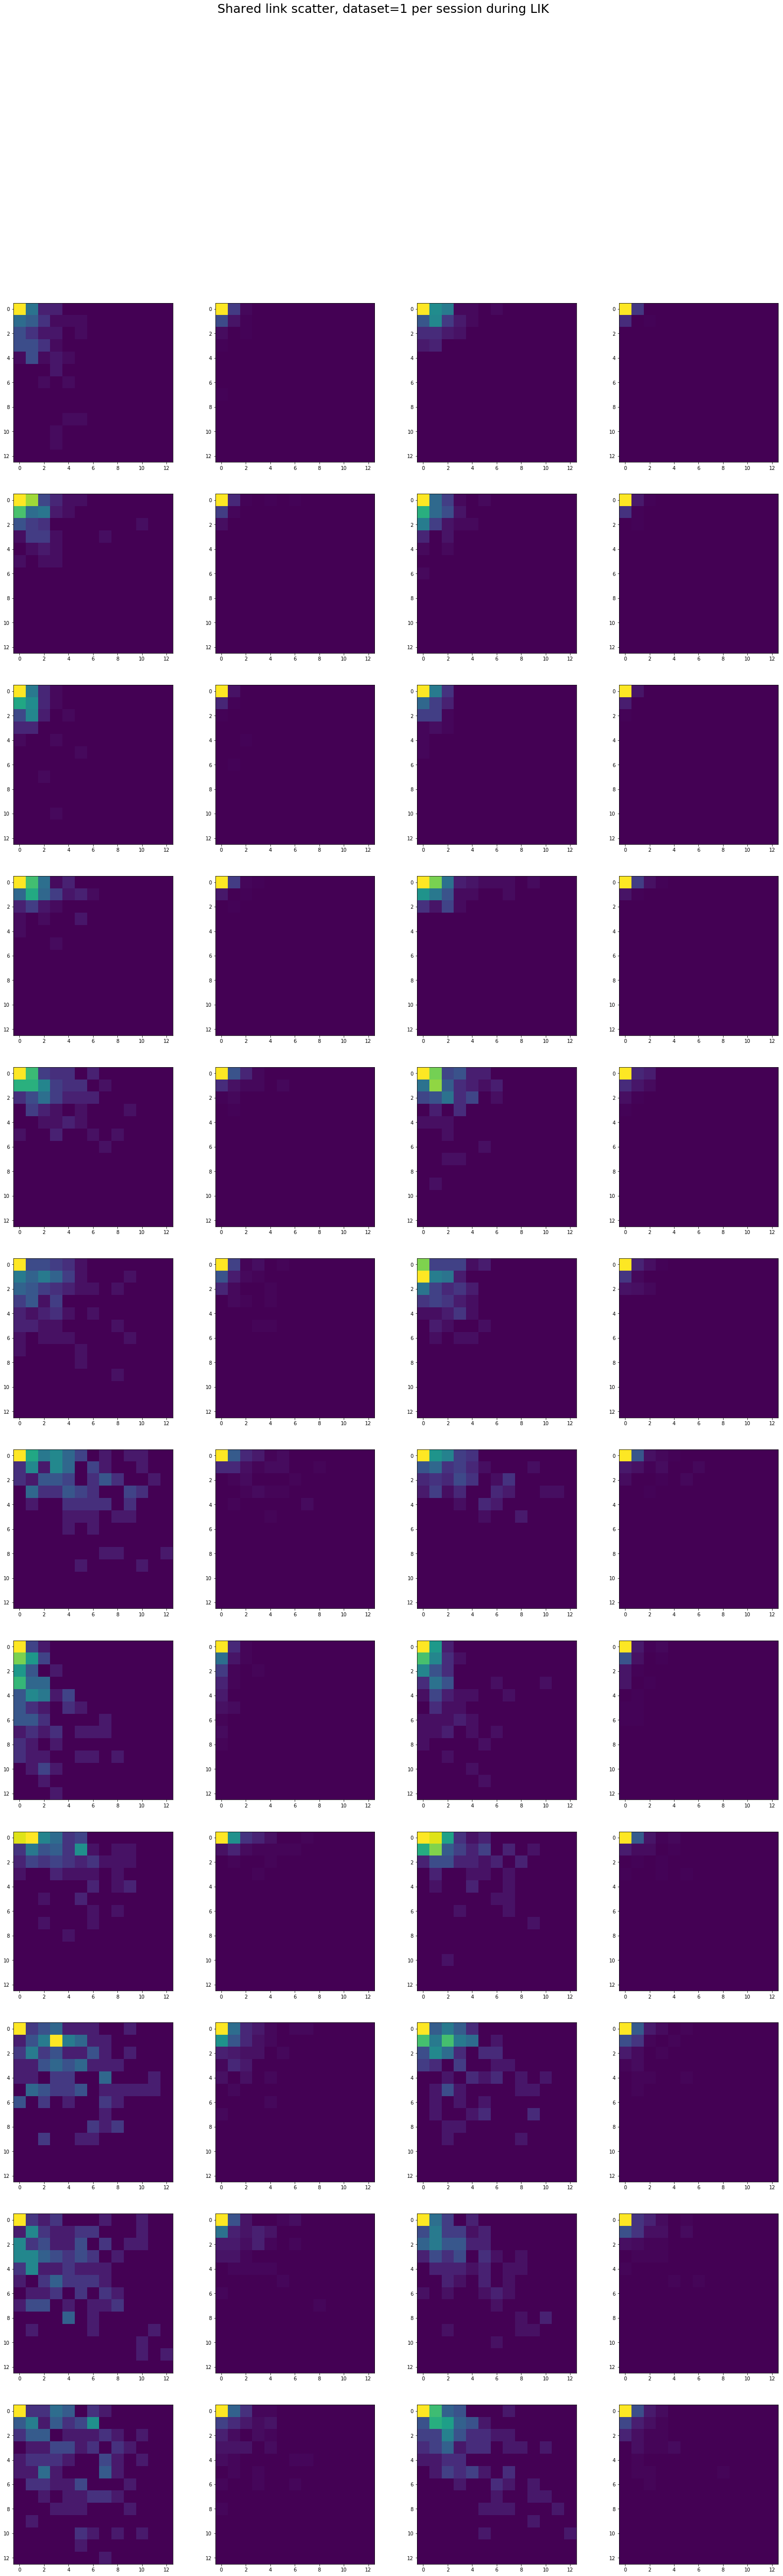

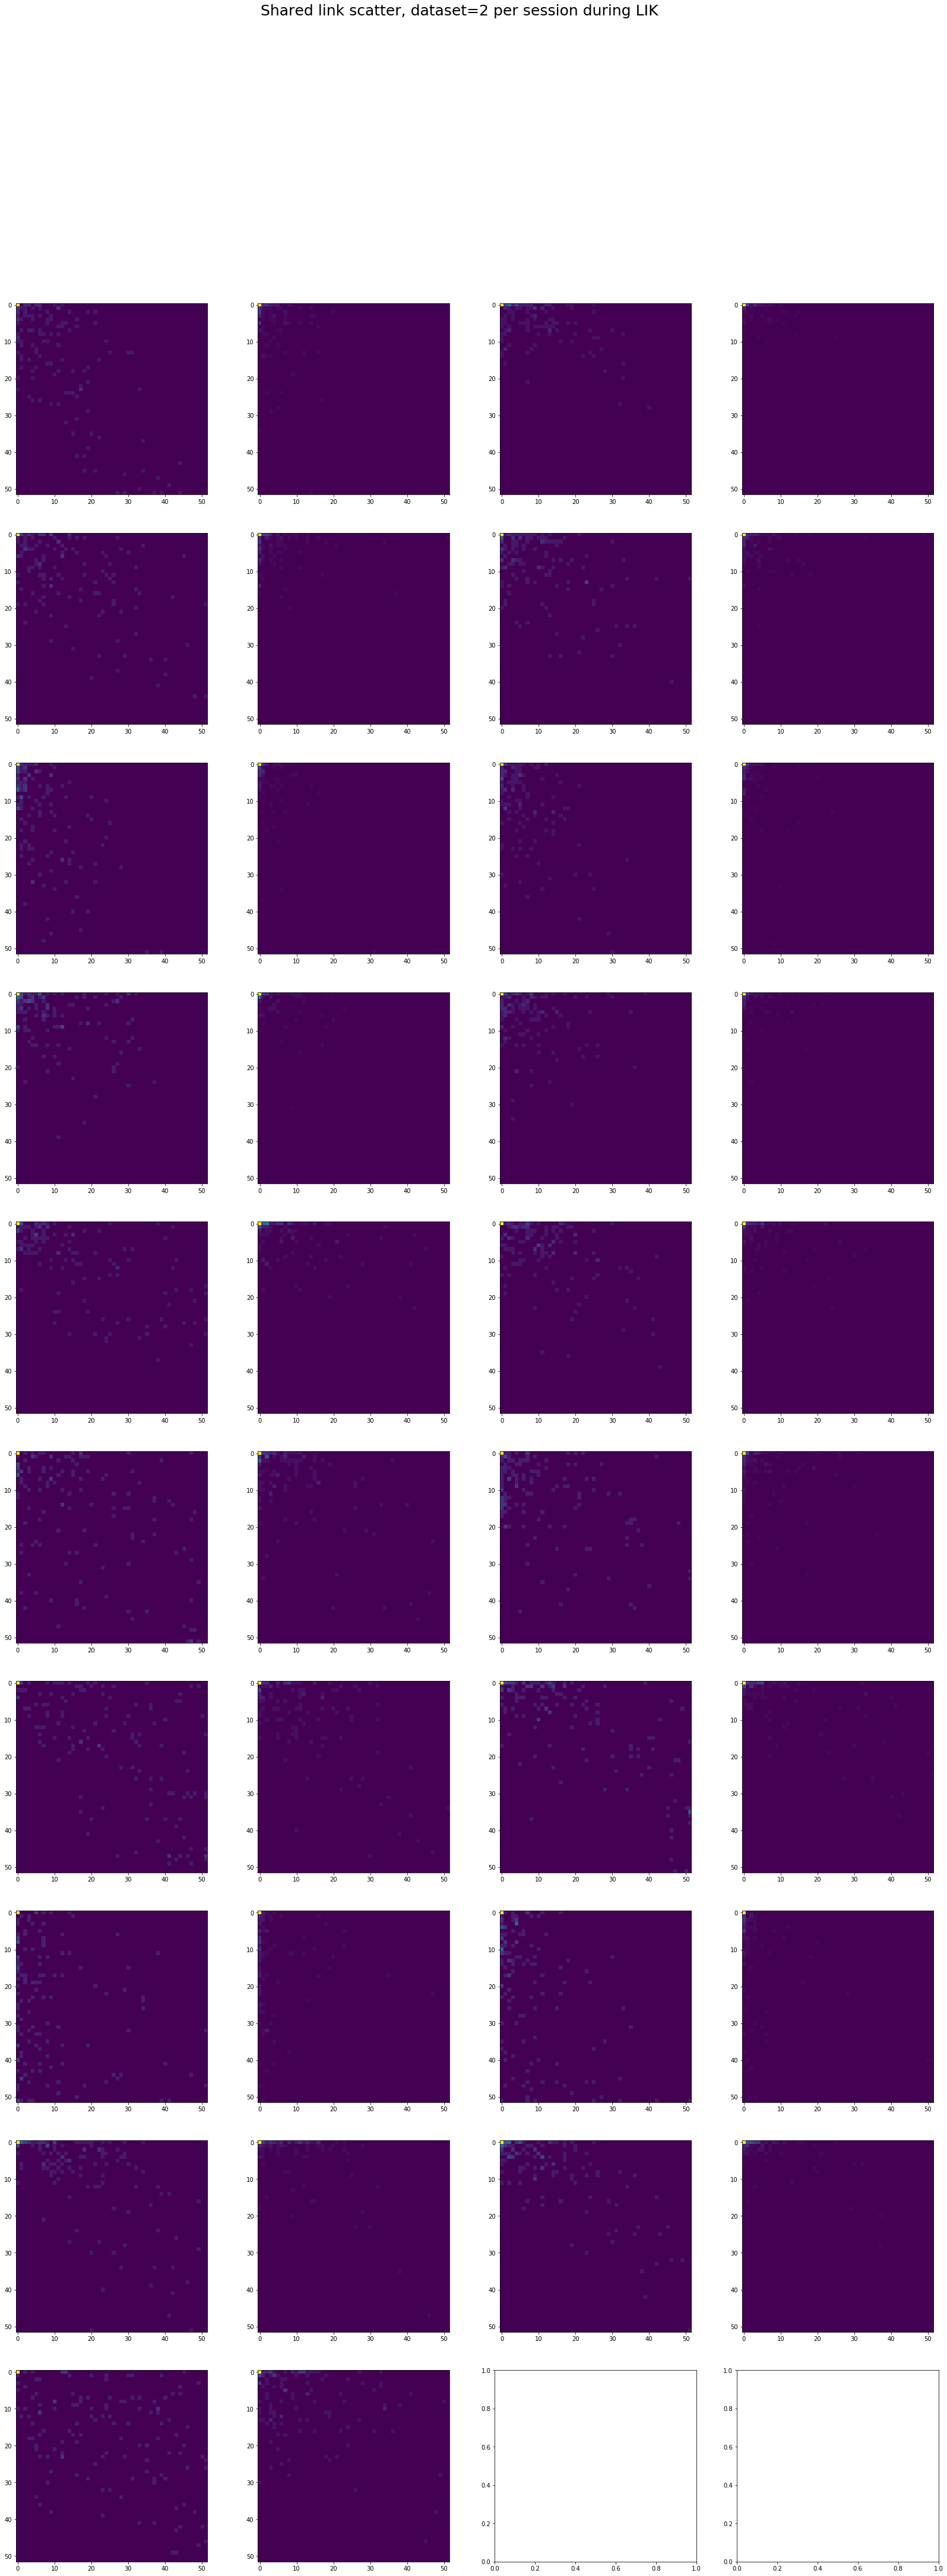

In [7]:
#################################
# Session : Shared Link Scatter
#################################
for rng_name, rng_sec in ranges_sec.items():
    for iDataSet, (basenames, stat) in enumerate(zip(basenamesets, statistics)):
        tflist = getTitlesAndIndices(stat, 'mtp_15', ["GO","NOGO"], ["BTE","MTE"], "swipe")

        nFiles = np.sum(tflist[0][1])
        fig, ax = plt.subplots(nrows=nFiles-1, ncols=nPlots, figsize=(7*nPlots, 7*(nFiles-1)))
        fig.suptitle('Shared link scatter, dataset='+str(iDataSet)+' per session during '+rng_name, fontsize=25)
        
        for idxPlot, (pTitle, idxs_ths) in enumerate(tflist):
            nConnPerRng = []
            for idxFile, (data, basename) in enumerate(zip(datasets[iDataSet][idxs_ths], basenames[idxs_ths])):
                te, lag, p = data
                
                N_TIMES = te.shape[2]
                rng = np.round((np.array(rng_sec) / 10.0 * N_TIMES)).astype(int)
                rng_len = rng[1] - rng[0] + 1

                te_rng = te[:,:,rng[0]:rng[1]]
                nConnPerRng += [np.sum(1-np.isnan(te_rng).astype(int), axis=2)]
                
            sharedConn = []
            
            nFiles = np.sum(idxs_ths)
            for idxFile in range(1, nFiles):
                M = np.zeros((rng_len, rng_len))
                for x, y in zip(nConnPerRng[idxFile-1].flatten(), nConnPerRng[idxFile].flatten()):
                    M[x][y] += 1
                ax[idxFile-1][idxPlot].imshow(M)


#totalConnPerConn[-1][-1].append(np.sum(1-np.isnan(te).astype(int), axis=2).flatten()  / (te.shape[0]**2 - te.shape[0]))
# fig2, ax2 = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
# for i, trial in enumerate(["GO","NOGO"]):#in enumerate(["ALL"]):
#     ax1[i][0].set_ylabel(trial)
#     for j, method in enumerate(["BTE","MTE"]):
        
#         ax2[i][j].set_xlabel("connection index, sorted")
#         ax2[i][j].set_ylabel("Frequency of occurence")
        
#         thisConn = np.array(totalConnPerConn[i][j])
#         sortedArgs = np.flip(np.argsort(np.sum(thisConn, axis=0)))
        
#         for conn in totalConnPerConn[i][j]:
#             ax2[i][j].plot(conn[sortedArgs], '.')

## Range Analysis

In [ ]:
isCorrectMouse = np.array([mname == 'mtp_15' for mname in mouse_names], dtype=int)

fig1, ax1 = plt.subplots(ncols=2, figsize=(10, 5))
fig2, ax2 = plt.subplots(nrows=2, ncols=3, figsize=(15, 5), tight_layout=True)

for i, trial in enumerate(["ALL"]):
    for j, method in enumerate(["BTE","MTE"]):
        ax2[j][0].set_ylabel(method)
        
        for k, rng in enumerate(["CUE", "TEX", "LIK"]):
            ax2[0][k].set_title(rng)
            
            idxs_ths = isCorrectMouse + isAnalysis["range"] + isTrial[trial] + isMethod[method] + isRange[rng] == 5
            print("For trials", trial,"range", rng,"method", method, "have", np.sum(idxs_ths), "files")
            
            nConn = []
            actSum = np.zeros((12,12))
            for fname, basename in zip(datafilenames[idxs_ths], basenames[idxs_ths]):
#                 print("Processing file: ", basename)
                te, lag, p = getData(fname)

                isActive = 1-np.isnan(te).astype(int)
                actSum += isActive
                nConn += [np.sum(isActive) / (te.shape[0]**2 - te.shape[0])]
#                 totalConnPerConn[-1][-1].append(np.sum(1-np.isnan(te).astype(int), axis=2).flatten()  / (te.shape[0]**2 - te.shape[0]))

            ax1[j].plot(nConn, label=rng)
            ax2[j][k].imshow(actSum)
    
        ax1[j].set_title(method)
        ax1[j].set_xlabel("day/file")
        ax1[j].set_ylabel("ratio of active connections")
        ax1[j].legend()        

In [ ]:
# for model in ["BivariateTE", "MultivariateTE"]:
#     for i in range(16, 20):
#         for rng in ["CUE", "TEX", "LIK"]:
#             fname = "mtp_15_2018_05_" + str(i) + "_a_" + model + "_range_" + rng + ".h5"
#             te, lag, p = getData(fname)
            
#             fig, ax = plt.subplots(ncols = 3, figsize=(15, 5))
#             ax[0].imshow(te[:,:], cmap="jet", vmin=0, vmax=1)
#             ax[1].imshow(lag[:,:], cmap="jet", vmin=1, vmax=5)
#             ax[2].imshow(p[:,:], cmap="jet", vmin=0, vmax=1)
#             ax[0].set_title("TE")
#             ax[1].set_title("delay")
#             ax[2].set_title("p-value")
            
#             fig.suptitle(fname)
#             plt.show()

## Processing swipe Data

In [ ]:
bte_te, bte_lag, bte_p = getData("mtp_15_2018_05_19_a_BivariateTE_swipe.h5")
mte_te, mte_lag, mte_p = getData("mtp_15_2018_05_19_a_MultivariateTE_swipe.h5")

# Interactive
def f(i):
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 8))
    ax[0][0].imshow(bte_te[:,:,i], cmap="jet", vmin=0, vmax=1)
    ax[1][0].imshow(mte_te[:,:,i], cmap="jet", vmin=0, vmax=1)
    ax[0][1].imshow(bte_lag[:,:,i], cmap="jet", vmin=1, vmax=5)
    ax[1][1].imshow(mte_lag[:,:,i], cmap="jet", vmin=1, vmax=5)
    ax[0][2].imshow(bte_p[:,:,i], cmap="jet", vmin=0, vmax=1)
    ax[1][2].imshow(mte_p[:,:,i], cmap="jet", vmin=0, vmax=1)
    
    ax[0][0].set_ylabel("Bivariate")
    ax[1][0].set_ylabel("Multivatiate")
    ax[0][0].set_title("TE")
    ax[0][1].set_title("delay")
    ax[0][2].set_title("p-value")
    plt.show()
    
interactive_plot = interactive(f, i=(0, bte_te.shape[2]-1, 1))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot